**Practical EDA: Applying 7 Core Techniques on a Real Dataset**

Here, We will apply 7 essential EDA techniques to a small dataset.  
This process works whether your dataset has 7 rows or 7 million!



We learned the theory behind:

1. Variable Identification  
2. Univariate Analysis  
3. Bivariate Analysis  
4. Outlier Detection  
5. Missing Value Treatment  
6. Variable Transformation  
7. Variable Creation



**Dataset Preview**

| Name   | Domain           | Age       | Location   | Salary    | Exp        |
|--------|------------------|-----------|------------|-----------|------------|
| Mike   | `Datascience#$`  | 34 years  | Mumbai     | `5^00#0`  | 2+         |
| Teddy^ | Testing          | 45' yr    | Bangalore  | `10%%000` | <3         |
| Umar#r | `Dataanalyst^^#` | NaN       | NaN        | `1$5%000` | 4> yrs     |
| Jane   | `Ana^^lytics`    | NaN       | Hyderbad   | `2000^0`  | NaN        |
| Uttam* | Statistics       | 67-yr     | NaN        | `30000-`  | 5+ year    |
| Kim    | NLP              | 55yr      | Delhi      | `6000^$0` | 10+        |

**Important Note**

Even though this dataset has only 6 rows, the same EDA techniques we apply here can be used on datasets with **thousands or even millions of rows**.  
**EDA is not about size — it’s about understanding, cleaning, and preparing your data for analysis and machine learning.**



**Plan of Action for Today**

We will apply each of the 7 EDA techniques to this dataset in order to:
- Clean inconsistent and messy values  
- Handle missing data  
- Standardize column types  
- Explore data patterns  
- Prepare it for machine learning models

In [1]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')


In [5]:
# Load the Excel file
emp=pd.read_excel(r"C:\Users\LAHARI\OneDrive\Desktop\FSDS\EDA\Dataset\Rawdata.xlsx")

In [6]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [7]:
# #  Load Raw Data Manually
# data = {
#     'Name': ['Mike', 'Teddy^', 'Umar#r', 'Jane', 'Uttam*', 'Kim'],
#     'Domain': ['Datascience#$', 'Testing', 'Dataanalyst^^#', 'Ana^^lytics', 'Statistics', 'NLP'],
#     'Age': ['34 years', "45' yr", np.nan, np.nan, '67-yr', '55yr'],
#     'Location': ['Mumbai', 'Bangalore', np.nan, 'Hyderbad', np.nan, 'Delhi'],
#     'Salary': ['5^00#0', '10%%000', '1$5%000', '2000^0', '30000-', '6000^$0'],
#     'Exp': ['2+', '<3', '4> yrs', np.nan, '5+ year', '10+']
# }

# emp = pd.DataFrame(data)
# emp

# Basic Data Inspection

In [11]:
id(emp)

2865096284480

In [10]:
emp.columns  # Lists all column names

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [12]:
emp.shape # Returns (rows,columns)

(6, 6)

In [8]:
emp.head() # Displays the first 5 rows

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year


In [9]:
emp.tail() # Displays the last 5 rows

,Name,Domain,Age,Location,Salary,Exp
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


# Dataset Summary Information

In [13]:
# Dataset Summary Information
emp.info() # Overview of data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


# Missing Value Check

In [14]:
# Missing Value Check
emp.isnull()  # Returns a DataFrame showing True for missing cells

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [15]:
emp.isna()       # Same as isnull(), both can be used interchangeably

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [16]:
emp.isnull().sum()   # Total number of missing values in each column

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

# EDA Technique

## Variable Transformation: Cleaned symbols, converted types

In [17]:
# Remove unwanted characters
# Remove all non-word characters from the 'Name' column
emp['Name'] = emp['Name'].str.replace(r'\W','',regex=True)
emp 

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy,Testing,45' yr,Bangalore,10%%000,<3
2,Umar,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [18]:
# Do same for all columns 
emp['Domain'] = emp['Domain'].str.replace(r'\W', '', regex=True)
emp['Age'] = emp['Age'].str.replace(r'\W', '', regex=True)
emp['Salary'] = emp['Salary'].str.replace(r'\W', '', regex=True)
emp['Location'] = emp['Location'].str.replace(r'\W', '', regex=True)
emp 

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34years,Mumbai,5000,2+
1,Teddy,Testing,45yr,Bangalore,10000,<3
2,Umar,Dataanalyst,NaN,NaN,15000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67yr,NaN,30000,5+ year
5,Kim,NLP,55yr,Delhi,60000,10+


In [19]:
# Extract digits from 'Age' and 'Exp'
emp['Age'] = emp['Age'].str.extract(r'(\d+)')
emp['Exp'] = emp['Exp'].str.extract(r'(\d+)')
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


## Missing Value Treatment: Used mean and mode

In [20]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [21]:
# Convert Age and Exp to numeric 
emp['Age'] = pd.to_numeric(emp['Age'])
emp['Exp'] = pd.to_numeric(emp['Exp'])

In [22]:
# fill missing values with mean (numeric values)
emp['Age'] = emp['Age'].fillna(emp['Age'].mean())
emp['Exp'] = emp['Exp'].fillna(emp['Exp'].mean())
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34.00,Mumbai,5000,2.0
1,Teddy,Testing,45.00,Bangalore,10000,3.0
2,Umar,Dataanalyst,50.25,NaN,15000,4.0
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67.00,NaN,30000,5.0
5,Kim,NLP,55.00,Delhi,60000,10.0


In [23]:
# Fill categorical nulls with mode
emp['Location'] = emp['Location'].fillna(emp['Location'].mode()[0])
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34.00,Mumbai,5000,2.0
1,Teddy,Testing,45.00,Bangalore,10000,3.0
2,Umar,Dataanalyst,50.25,Bangalore,15000,4.0
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67.00,Bangalore,30000,5.0
5,Kim,NLP,55.00,Delhi,60000,10.0


**Convert Data Types**

Before performing data type conversions (like `.astype(int)`), it is essential to handle missing values.  

* You must either:
  
  - Fill missing values using `.fillna()`  
  - Or drop them using `.dropna()`  

* Otherwise, pandas will raise errors like `IntCastingNaNError` because types like `int` and `category` **do not support NaN**.


In [24]:
emp['Age'] = emp['Age'].astype(int)
emp['Exp'] = emp['Exp'].astype(int)
emp['Salary'] = pd.to_numeric(emp['Salary'])

emp['Name'] = emp['Name'].astype('category')
emp['Domain'] = emp['Domain'].astype('category')
emp['Location'] = emp['Location'].astype('category')

emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int64   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int64   
 5   Exp       6 non-null      int64   
dtypes: category(3), int64(3)
memory usage: 938.0 bytes


In [25]:
emp.to_csv('Clean_data.csv', index=False)
# Check your current working directory using:
import os
os.getcwd()

'c:\\Users\\LAHARI\\Downloads'

## Univariate Analysis: Distplots, histograms

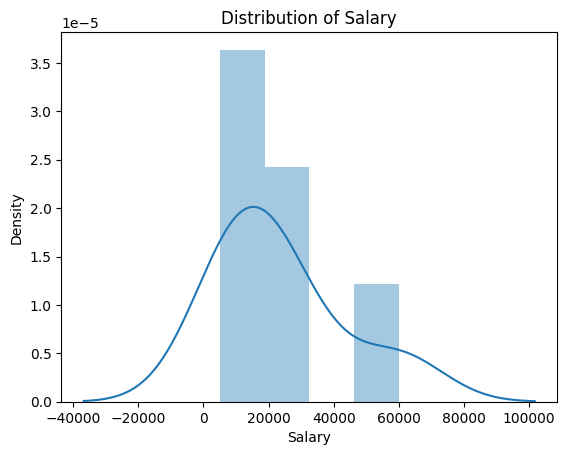

In [26]:
# Univariate Plot 
vis1=sns.distplot(emp['Salary'])
plt.title('Distribution of Salary')
plt.show()

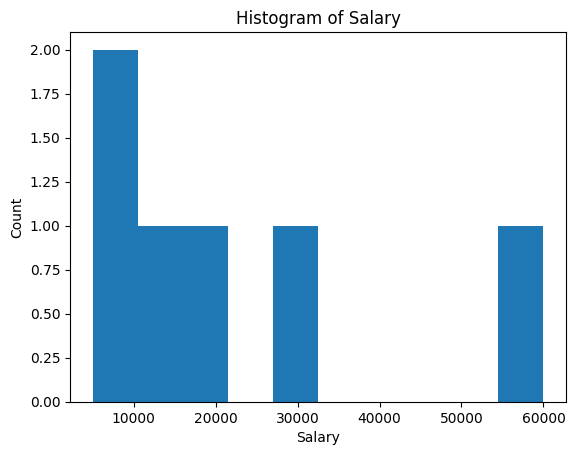

In [27]:
# Histogram
vis2=plt.hist(emp['Salary'])
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Count') 
plt.show()

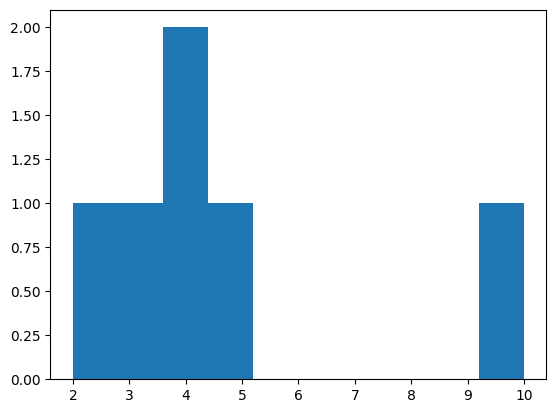

In [28]:
vis3=plt.hist(emp['Exp'])

## Outlier Detection: Visually via plots

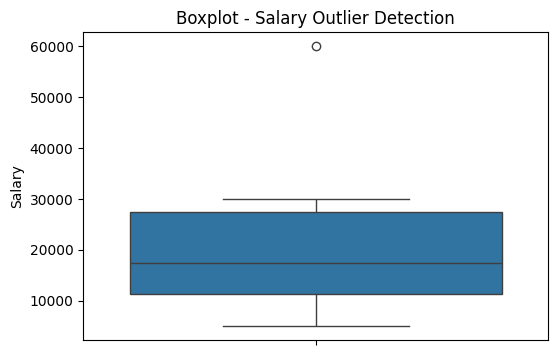

In [30]:
plt.figure(figsize=(6,4))
vis4=sns.boxplot(emp['Salary']) 
plt.title('Boxplot - Salary Outlier Detection') 
plt.show() 

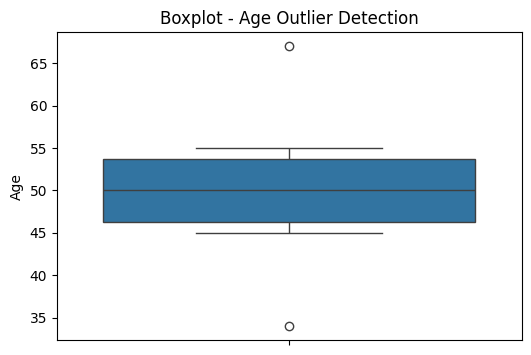

In [31]:
plt.figure(figsize=(6,4)) 
vis5 = sns.boxplot(emp['Age']) 
plt.title('Boxplot - Age Outlier Detection')  
plt.show()

## Bivariate Analysis: Regression plots with seaborn

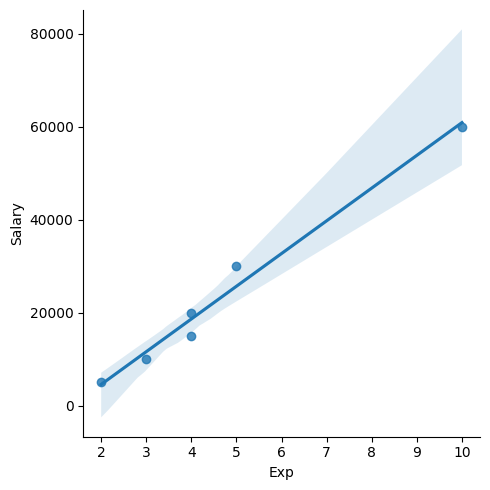

In [32]:

vis6=sns.lmplot(data = emp, x='Exp', y='Salary')

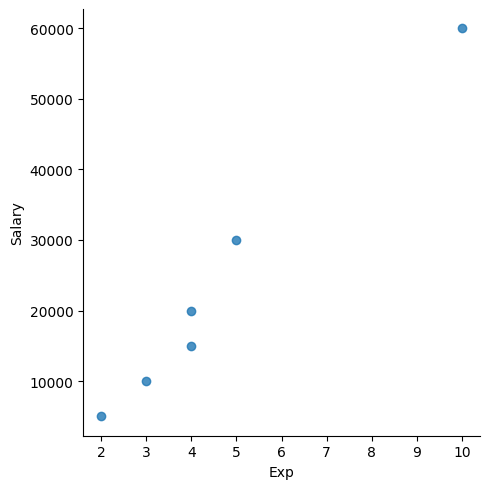

In [33]:
# Bivariate - Without regression 
vis7=sns.lmplot(data=emp,x='Exp',y='Salary',fit_reg=False)

## Variable Identification: Selected X_iv and y_dv

In [34]:
# Slicing and Indexing before Variable Identification
df = emp.copy()
df[:]       # All rows

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [35]:
df[0:6:2] # Every second row from first 6

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
2,Umar,Dataanalyst,50,Bangalore,15000,4
4,Uttam,Statistics,67,Bangalore,30000,5


In [36]:
df[::-1] # Reverse order of rows

,Name,Domain,Age,Location,Salary,Exp
5,Kim,NLP,55,Delhi,60000,10
4,Uttam,Statistics,67,Bangalore,30000,5
3,Jane,Analytics,50,Hyderbad,20000,4
2,Umar,Dataanalyst,50,Bangalore,15000,4
1,Teddy,Testing,45,Bangalore,10000,3
0,Mike,Datascience,34,Mumbai,5000,2


In [39]:
df.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [40]:
# Splitting Features (X_iv) and Target (y_dv)
X_iv = emp[['Name', 'Domain', 'Age', 'Location', 'Exp']] # Independent variables
y_dv = emp[['Salary']]  # Dependent variable

In [42]:
X_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [43]:
y_dv=df[['Salary']]

In [44]:
y_dv

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000



## Variable Creation: One-hot encoded categorical variables

In [45]:
# One-hot encoding
imputation = pd.get_dummies(df)

In [46]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1,45,10000,3,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
2,50,15000,4,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
3,50,20000,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,67,30000,5,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False
5,55,60000,10,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False


**Final Summary of 7 Core Techniques:**

1. Variable Transformation: Cleaned symbols, converted types
2. Missing Value Treatment: Used mean and mode 
3. Univariate Analysis: Distplots, histograms
4. Outlier Detection: Visually via plots
5. Bivariate Analysis: Regression plots with seaborn
6. Variable Identification: Selected X_iv and y_dv
7. Variable Creation: One-hot encoded categorical variables 